# Question 7: Visualising Aliquot Sequences that Enter Loops

In this question, we aimed to visually represent how and why some aliquot sequences enter loops. From our experimentation in q4 and q5, you can see that only a very small proportion of aliquot sequences actually enter loops, ~2.3% with the standard paramters.

QUESTION 4 AND 5 WILL SOLVE ALOT OF THESE ISSUES !!

PROPORTION PIE CHART !!!!! WILL RELY ON HOW WE MAKE LISTS OF CATEGORIES IN Q5

We wanted to look at how our parameters affected the proportion of how many sequences enter loops, and here you can observe that the higher the number of iterations the more loops detected, highlighting that some sequences take longer than others to enter the looping portion of the sequence.

In [ ]:
## creating a simplified loop detection that we can use for experimenting with loops
def loop_checker(up_to_n, iterations):

    # setting up boolean to identify if loop is detected
    is_loop = False
    loops = []
    
    for n in range(up_to_n):
        
        ali = a(n, iterations, 10**9)
        is_loop = False
        
        # checks if loop terminates at 0, and return False if so
        if ali[len(ali) - 1] == 0:
            is_loop = False
        # checks if loop is greater than limit, and returns False if so
        elif s(ali[len(ali) - 1]) > 10**9:
            is_loop = False
        
        else:
            for i in range(len(ali)):
                # detecting if the ith value is part of a looping aliquot sequence - if so,
                #  the current sequence must also loop
                if is_loop == True:
                    break
                # checking if two values are the same, hence indicating a loop
                for j in range(i + 1, len(ali)):
                    if ali[i] == ali[j]:
                        is_loop = True
                        loops.append(n)
                        break
    return loops  

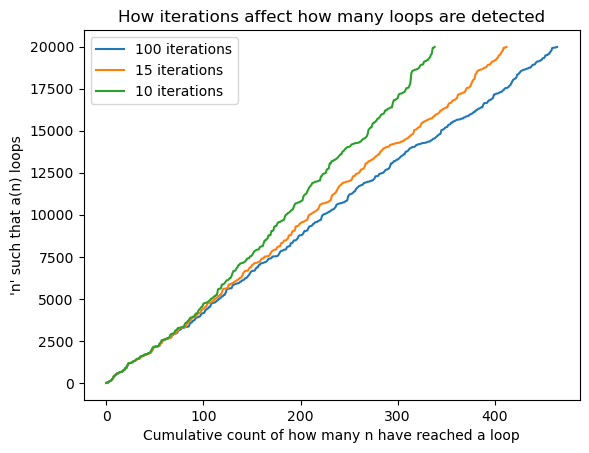

In [ ]:
## line graphs to show how many loops are formed changes as you change iterations
## x axis is the cumulative number of n-values that have reached a loop
## y axis is n < 20,000, marking if said n creates an aliquot sequence that loops

plt.figure() 

# three scenarios to use as examples: k=100, k=15, k=10
plt.plot(loop_checker(20000, 100), label = "100 iterations")
plt.plot(loop_checker(20000, 15), label = "15 iterations")
plt.plot(loop_checker(20000, 10), label = "10 iterations")

plt.ylabel("'n' such that a(n) loops")
plt.xlabel('Cumulative count of how many n have reached a loop')
plt.title("How iterations affect how many loops are detected")
plt.legend()
plt.show()

Interestingly, there is a larger difference between how many loops when $k=10$ and $k=15$, a gap of only 5, that between $k=15$ and $k=100$, a gap of 85. This may suggest that most aliquot sequences enter loops relativley early on in their sequence.

**Sociable, amicable, and perfect numbers**

The first thing we wanted to find out was what triggered a loop in an aliquot sequence - through generating large sample sizes, we noticed a pattern of recurring numbers that often featured in looping sequences, such as 6, 220, 1210, and 12496. 

These numbers are all examples of sociable numbers - numbers whose sum of proper divisors form a cycle. For an aliquot sequence to enter a loop, it must be 'triggered' by a sociable number - that is $s^k(n)$ must equal a sociable number for some $k \in \mathbb{N} $. 

Below is a graph representing 22 different looping aliquot sequences, that are all 'triggered' by the same sociable number 2620. As you can see, though all reaching 2620 at different terms in thier sequence, they all enter the same looping pattern.

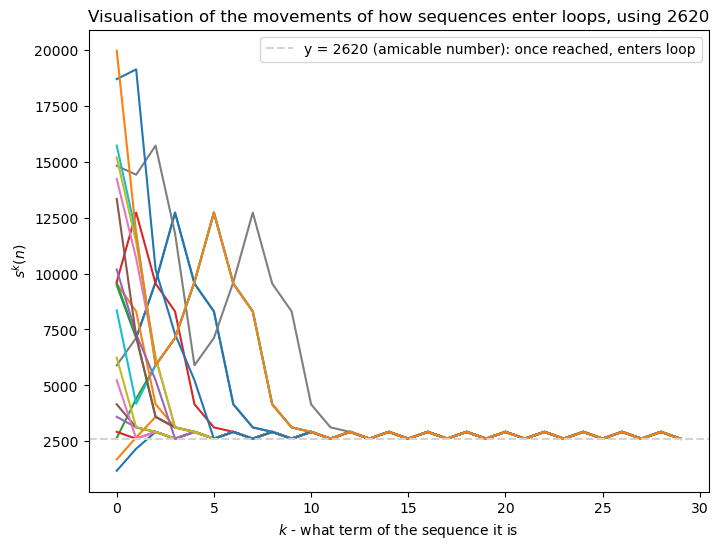

In [ ]:
## plotting a graph of all the loops that reach the amicable number 2620

plt.figure(figsize=(8,6))

# using standard parameters
it = 30
lim = 10**9
it_samples = (list(range(0, it)))

# reaches_2620 was a list formed when categorising the numbers into 
#                 the different types of sociable number
for n in reaches_2620:
    plt.plot(it_samples, a(n, it, lim))

# plotting y = 2620 to show when each sequence reaches it
line_2620 = plt.axhline(y = 2620, color='lightgray' , 
                        label= 'y = 2620 (amicable number): once reached, enters loop' , 
                        linestyle = '--')


plt.title('Visualisation of the movements of how sequences enter loops, using 2620')
plt.xlabel('$k$ - what term of the sequence it is')
plt.ylabel('$s^k(n)$')
plt.legend()

plt.show()


As you can see, they often follow the same pattern even before a loop is triggered.

There are three kinds of sociabl number, all triggering loops in aliquot sequences:
* *perfect numbers* - they are the sum of their own divisors e.g 1 $\cdot$ 2 $\cdot$ 3 = 6 = 1+2+3
* *amicable numbers* - found in pairs, where the sum of one number's divisors equal another number, and vice versa e.g [220, 284]
* *sociable number* - an umbrella term, we will use to refer to numbers that trigger a loop with cycle > 2. These are the rarest, and only two exist under 20,000 - 12496 and 14316.

Below is a visual representation of three aliquot sequences, all looping but each triggered by a different category of number.

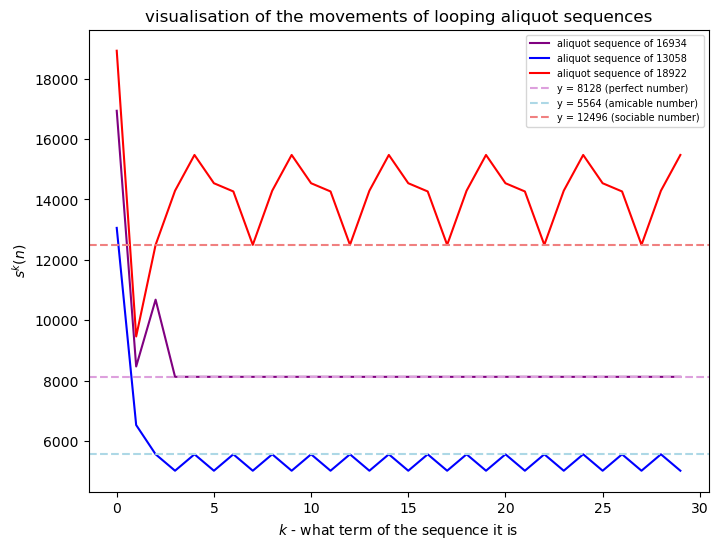

In [ ]:
## plotting graph showing the aliquot sequences of 16934, 13058, and 18922, and the sociable 
## numbers they reach. These aren't especially important loops, we chose as they are in a 
##    close range to eachother (graph is neater).
## they aren't sociable themselves, so can see how they enter loops

plt.figure(figsize=(8,6))

# using standard parameters
it = 30
lim = 10**9
it_samples = (list(range(0, it)))

# the 3 looping aliquot sequences - using a(n) function from q2
plt.plot(it_samples, a(16934, it, lim), color='purple' , label='aliquot sequence of 16934')
plt.plot(it_samples, a(13058, it, lim), color='blue', label='aliquot sequence of 13058')
plt.plot(it_samples, a(18922, it, lim), color='red', label='aliquot sequence of 18922')

# plotting the sciable numbers they reach, so can see how these 'trigger' the loop
plt.axhline(y = 8128, color='plum' , label='y = 8128 (perfect number)' , linestyle = '--')
plt.axhline(y = 5564, color='lightblue', label='y = 5564 (amicable number)', linestyle = '--')
plt.axhline(y = 12496, color='lightcoral', label='y = 12496 (sociable number)', linestyle = '--')


plt.title('visualisation of the movements of looping aliquot sequences')
plt.xlabel('$k$ - what term of the sequence it is')
plt.ylabel('$s^k(n)$')
plt.legend(fontsize = 7)

plt.show()

Now we had learned *why* aliquot sequences enter loops, we wanted to have a visual look at the proportion of how many loops are triggered by each category of number. 

We created some pie charts to compare how often specific numbers appear, but first had to build some functions to categorise and count these lists.

In [ ]:
## function to return the lists of all amicable numbers below a certain n value, can then use 
## this data to make graphs showing proportions.

def loop_types(n, iterations):

# input a number, n, and it returns all perfect, amicable, 
#    and sociable numbers and their counts up to n.

    # sociable numbers were hard to deal with as had different cycle lengths, and ware so 
    # few cases. ultimatley we felt hardcoding would be the most efficient way, just for this
    # category.
    
    perfect_nums = []
    amicable_nums = []
    sociable_nums = [12496, 14316]
    count_pn = 0
    count_an = 0
    count_sn = 0
    p_nums_list = []
    a_nums_list = []
    s_nums_list = []

    for i in range(2 , n):

        #only need the first 3 numbers in the aliquot sequence to know if it's amicable
        #  or perfect, as dealing with sociable later.
        ali = a(i, 30, 10**9)

        # if both first terms are the same, it's a perfect number
        if ali[0] == ali[1]:
            perfect_nums.append(i)

        # if first and third terms are the same, it's an amicable number
        elif ali[0] == ali[2] and ali[0] != ali[1]:

            # ensuring it doesn't add the same pair twice
            if [ali[1], ali[2]] in amicable_nums:
                continue
            else:        
                amicable_nums.append([ali[0], ali[1]])

    # counting each type to make data easier to use
    loops_list = loop_checker(n, iterations)
    
    for s in range(len(loops_list)):

        specific_loop = loops_list[s]
        
        # set is_sociable as boolean so that if it's not perfect or amicable, it's sociable.
        is_sociable = True
        ali = a(specific_loop, iterations, 10**9)

        # counts the amount of perfect numbers
        for p in perfect_nums:
            if p in ali:
                count_pn += 1
                is_sociable = False
                p_nums_list.append(specific_loop)
                
        # counts the amount of amicable numbers
        for a_n in amicable_nums:
            if a_n[0] in ali:
                count_an += 1
                is_sociable = False
                a_nums_list.append(specific_loop)

        # counts the amount of sociable numbers
        if is_sociable == True:
            count_sn +=1
            s_nums_list.append(specific_loop)

    counts = {"Perfect Numbers": count_pn, "Amicable Numbers": count_an, "Sociable Numbers": count_sn}

    # returns list of all types of numbers that loop, and their counts
    return perfect_nums, amicable_nums, sociable_nums, counts, p_nums_list, a_nums_list, s_nums_list


In [ ]:
## Individual Sociable Number counts -- using when looking at how often they are individually 
## represented in loops, not just as a category.

p_num_counts = {}
a_num_counts = {}
s_num_counts = {}
count = 0

perfect_nums, amicable_nums, sociable_nums, counts, p_nums_list, a_nums_list, s_nums_list = loop_types(20000, 100)

for p in perfect_nums:
    count = 0
    # using list of perfect numbers formed in loop_types
    for i in p_nums_list:
        ali = a(i, 100, 10**9)
        # adds to count if detected in an aliquot sequence
        if p in ali:
            count += 1
    # will be equal to the amount of loops that reach a perfect number
    p_num_counts[p] = count

for a_n in amicable_nums:
    count = 0

    for i in a_nums_list:
        ali = a(i, 100, 10**9)
        if a_n[0] in ali:
            count += 1
    
    # will be equal to the amount of loops that reach an amicable number
    a_num_counts[tuple(a_n)] = count

for s_n in sociable_nums:
    count = 0

    for i in s_nums_list:
        ali = a(i, 100, 10**9)
        if s_n in ali:
            count += 1
    
    # will be equal to the amount of loops that reach a sociable number
    s_num_counts[s_n] = count


The below pir chart shows the proportion that each category of sociable number (perfect, amicable, and standard sociable) appears in loops, thus what category triggers the most. Additionallly, it's outer ring show the most common number that appears in loops of each category.

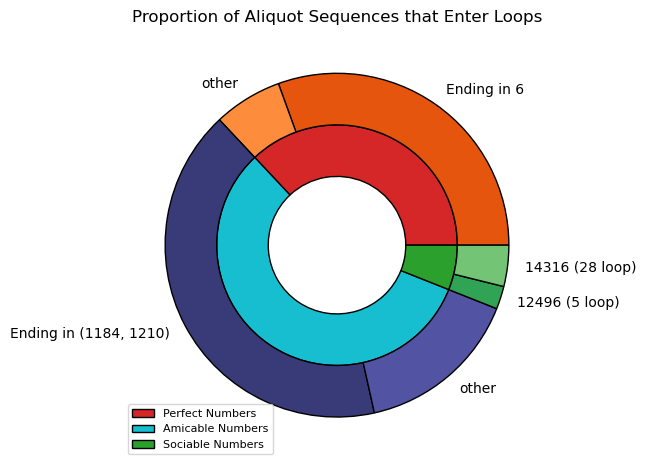

In [ ]:
## Layered Pie Chart: the inner ring shows the proportion of what category of sociable number
## trigger loops, the outer ring shows, of said categories, what numbers are most represented in 
##  

perfect_nums, amicable_nums, sociable_nums, counts, p_nums_list, a_nums_list, s_nums_list = loop_types(20000, 30)

p_counts = []
a_counts = []
s_counts = []

for key, value in p_num_counts.items():
        p_counts.append(value)

for key, value in a_num_counts.items():
    a_counts.append(value)

for key, value in s_num_counts.items():
    s_counts.append(value)

max_p = max(p_counts)
max_a = max(a_counts)

p_counts.remove(max_p)
a_counts.remove(max_a)

new_p_counts = [max_p, sum(p_counts)]
new_a_counts = [max_a, sum(a_counts)]

fig, ax = plt.subplots()

size = 0.3
vals = np.array([new_p_counts, new_a_counts, s_counts])

tab10 = plt.color_sequences["tab10"]
tab20c = plt.color_sequences["tab20c"]
tab20b = plt.color_sequences["tab20b"]
outer_colours = [tab20c[i] for i in [4, 5]] + [tab20b[i] for i in [0, 1]] + [tab20c[i] for i in [8, 9]] 
inner_colours = [tab10[i] for i in [3, 9, 2]] 

inner_labels = ["Perfect Numbers", "Amicable Numbers", "Sociable Numbers"]
outer_labels = ["Ending in 6", "other", "Ending in (1184, 1210)", "other", "12496 (5 loop)", "14316 (28 loop)"]

ax.pie(vals.sum(axis=1), radius=1-size, colors = inner_colours,
       wedgeprops=dict(width=size, edgecolor='k'))
plt.legend(inner_labels, fontsize=8, loc = "lower left")

ax.pie(vals.flatten(), radius=1, colors = outer_colours,
       wedgeprops=dict(width=size, edgecolor='k'), labels = outer_labels)

ax.set(aspect="equal", title='Proportion of Aliquot Sequences that Enter Loops')
plt.tight_layout()
plt.show()

Above, you can see that some a few numbers *heavily* dominate the loops, with most 'perfect number loops' being triggered by 6, most 'amicable number loops' being triggered by the pair (1184, 1210), and most 'sociable number loops' being triggered by 14316.

Additionally, you can see that most loops are triggered by amicable numbers. We wanted to know if this was proportionate to the total number of amicable numbers < 20,000, so belowe made two graphs to check if each category is equally represented in loops as they are overall.

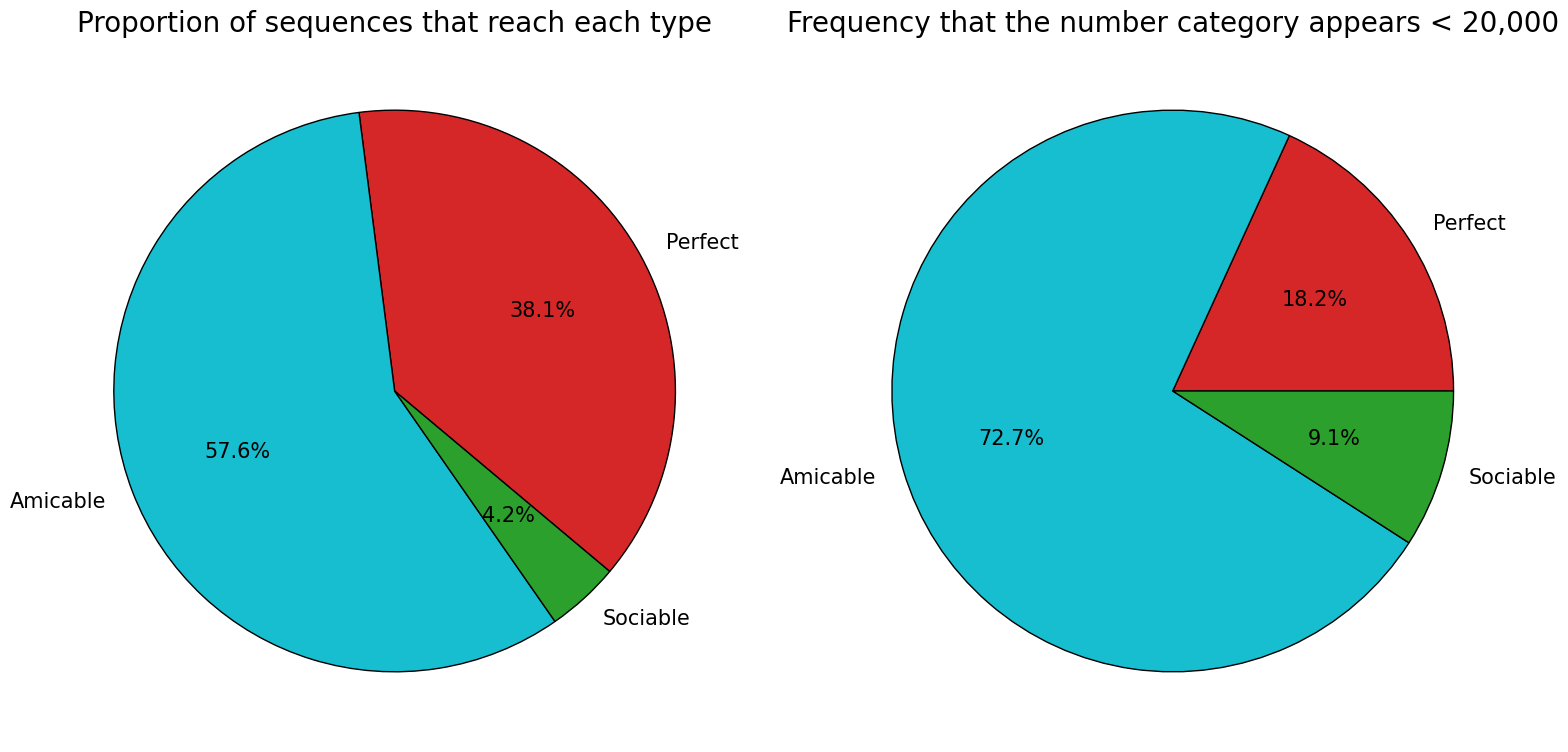

In [ ]:
## two side by side pie charts: the first one shows how each category is represented across only
## looping sequences, the other shows how many of each category appears below < 20,000

sizes_prop = [len(p_nums_list), len(a_nums_list), len(s_nums_list)]
# have to times amicable by two, as they come in pairs
sizes_freq = [len(perfect_nums), len(amicable_nums)*2, len(sociable_nums)]

tab10 = plt.color_sequences["tab10"]
colors = [tab10[i] for i in [3, 9, 2]]

sizes = [sizes_prop, sizes_freq]

labels = ["Perfect", "Amicable", "Sociable"]
titles = ["Proportion of sequences that reach each type", 
          "Frequency that the number category appears < 20,000"]

fig, axes = plt.subplots(1, 2, figsize=(16, 8))
angles = [320, 360]

for i in range(2):
    wedges, texts, autotexts = axes[i].pie(sizes[i], labels=labels, autopct='%1.1f%%',
        startangle=angles[i], colors=colors, wedgeprops=dict(edgecolor='k'),
        textprops={'fontsize': 15})

    axes[i].set_title(titles[i], fontsize=20)
    axes[i].set(aspect="equal")

plt.tight_layout()
plt.show()


Interestingly, you can see that even though amicable numbers are found most often in sequences, it is still a dispraportionaly smaller representation than how often they appear. Despite there only being four, perfect numbers represent a large chunk of looping sequences. 